# Variant Call Adjacency Matrix


An interconnected matrix of variants from data in 1000 genomes.


# GA4GH Server Connection Established

Here, like the 1kg example, a client object is used to communicate with the server.

In [1]:
from __future__ import print_function
import ga4gh.client as client
client = client.HttpClient("http://1kgenomes.ga4gh.org")

import collections
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import ImageGrid
from numpy.random import RandomState
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import unirest
import requests 
import json
from multiprocessing import Pool
#from finch import Model, Collection, StringField
from finch import *
import operator
import random 

# Data Sets 

In [2]:
datasets = list(client.search_datasets())
print("Datasets")
for dataset in datasets:
    print("Name: {}".format(dataset.name))

Datasets
Name: 1kgenomes


In [3]:
dataset = client.get_dataset(datasets[0].id)

In [4]:
release = None
functional = None
for variant_set in client.search_variant_sets(dataset_id=dataset.id):
    if variant_set.name == "phase3-release":
        release = variant_set
    else:
        functional = variant_set

In [5]:
callsi = list(client.search_call_sets(release.id))

variant_sets = list(client.search_variant_sets(dataset.id))
variant_set_id = variant_sets[0].id

call_set_ids = []

for csi in callsi:        
    call_set_ids.append(csi.id)

In [6]:
def map_call_set_ids_to_population_group():
    
    population_map = {}
    
   
    for call_set in client.search_call_sets(release.id):
        bio_sample = client.get_bio_sample(call_set.bio_sample_id)
        population_map[call_set.id] = bio_sample.info['Population'].values[0].string_value 
    
    
    
    return population_map

In [7]:
map_call_set_ids_to_population_group()

{u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjMyMiJd': u'ACB',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMzU3NSJd': u'MSL',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTg3MyJd': u'KHV',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkEyMDg1NCJd': u'GIH',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTMxMSJd': u'PUR',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkEyMDMxNyJd': u'ASW',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkExODU0MSJd': u'CHB',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTM1MSJd': u'CLM',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjE4NiJd': u'CDX',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkExODg4MSJd': u'YRI',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkEyMDUyNCJd': u'TSI',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkEyMTA4OSJd': u'GIH',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiTkExODkxNSJd': u'YRI',
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1

In [11]:
def random_sample_population_group():
    
    population_map = {}
    population_map = map_call_set_ids_to_population_group()
    
    #population_map_list = population_map.items()
     
    population_map = sorted(population_map.items(), key=operator.itemgetter(1))    
        
        
    #randomized_population_map = {}
    """
    temp_map = {}
    k = 0
    for i,j in population_map_list:
        temp_map = {}
        while ( k <= 9):
            for l in population_map:
                if ( population_map[l] == j):
                    randomized_population_map[l] = j
            k += 1
    """
    #keys = random.sample(population_map_list, 10)
    #return keys
    #return randomized_population_map
    return population_map        

In [12]:
random_sample_population_group()

[(u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjMyMiJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjU0MSJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjMxNCJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjU1NCJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjQ3NiJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTg4MCJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjA1NCJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTk4OSJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjMzMiJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjEwNyJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTk5MCJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMjMwOCJd', u'ACB'),
 (u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMTg5NCJd', u'ACB'),
 (u'WyIxa2dl

# generate_dictionary function

generates a dictionary of call set id keys and values for the index of that the call set id appeared throughout a list of variants within a given range on the human genome

In [8]:
def generate_dictionary(num_people, num_chrom, begin, stop):
    
    #x = data.searchVariants(variantSetId, start=begin, end=stop, 
    #referenceName = num_chrom).next()
      
    dictionary = {}
    
    variants = client.search_variants(variant_set_id, call_set_ids= call_set_ids[0:num_people],
           start=begin, end=stop, reference_name = num_chrom )
    
    i = 0
    for v in variants:
        for call_inner in v.calls:
            i += 1
            dictionary[call_inner.call_set_id] = i
    
    return (dictionary)  

# normalize_indexes function

initializes the indexes of the variant dictionay to be {0,...,n} where n is the number of call set ids 

In [9]:
def normalize_indexes(dictionary):
       
    keys = []
    keys = dictionary.keys()
    
    new_dictionary = {}
    i = 0
    j = 0
    k = 0
    for i in range(len(dictionary)):        
        l = keys[j]
        dictionary[l] = k
        j += 1
        k += 1
    
    return dictionary

In [10]:
dictionary = generate_dictionary(40, "1", 100000, 105000 )
#print()
normalize_indexes(dictionary)

{u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDA5NiJd': 20,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDA5NyJd': 14,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDA5OSJd': 8,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDE0MCJd': 17,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMCJd': 27,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMSJd': 15,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMiJd': 34,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMyJd': 38,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwNSJd': 30,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwNiJd': 5,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwNyJd': 1,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwOCJd': 32,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwOSJd': 6,
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDExMCJd': 36,
 u'WyIxa2dlbm9tZXMiLCJ2c

# variant_matrix function

This function connects two identical sets of participant sample's callSetId's through the variants shared between them.

                     M D (Mother/Father allele donated)
    Where A or B =  [1,0] : heterozygous for variant
                    [0,1] : heterozygous for variant
                    [1,1] : homozygous dominant for variant
                    [0,0] : homozygous recessive for variant
                 
        | 1    |  0    |
      1 |[1,1] | [1,0] |
        |      |       |      
      0 |[1,0] | [0,0] |
    
    
    True for the shared genotype:
        
        case 1: 
            A = [1,0]
            B = [0,1]
        case 2: 
            A = [0,0]
            B = [0,0]
        case 3:  
            A = [1,0]
            B = [1,0]
        case 4: 
            A = [1,1]
            B = [0,1]
    
    False for the shared genotype:
        
        case 1: 
            A = [1,0]
            B = [0,0]
        case 2:
            A = [0,1]
            B = [0,0]
        case 3: 
            A = [0,0]
            B = [1,0]
        case 4:
            A = [0,0]
            B = [0,1]
            
            

In [11]:
def variant_matrix(callMatrix, num_people, num_chrom, begin, stop):
#def variant_matrix(callMatrix):
        
    csid_dict = {}    
    csid_dict = generate_dictionary(num_people, num_chrom, begin, stop)
    
    normalize_indexes(csid_dict)
    
    h = len(csid_dict)
    w = len(csid_dict)
    dimension = h*w
    
    callMatrix = [[0 for x in range(w)] for y in range(h)]    
    np.zeros((h,w))     
    #np.reshape(callMatrix, (h,w))
    
    vs = client.search_variants(variant_set_id, call_set_ids= call_set_ids[0:num_people],
           start=begin, end=stop, reference_name = num_chrom)
    
    for v in vs:
        #outer_counter = 0
        for call_outer in v.calls: 
            #inner_counter =0
            #outer_counter += 1
            for call_inner in v.calls:
                #inner_counter += 1
                #if inner_counter < outer_counter:
                #    continue
                outer_index = csid_dict[call_outer.call_set_id] 
                inner_index = csid_dict[call_inner.call_set_id]                             
                # can be 0 or 1
                A1 = call_outer.genotype[0] 
                A2 = call_outer.genotype[1]
                B1 = call_inner.genotype[0]
                B2 = call_inner.genotype[1]               
                # True for the shared genotype
                if (((A1 + A2 ) > 0) and ((B1 + B2) > 0)):
                    callMatrix[outer_index][inner_index] += 1
                    #if outer_index != inner_index:
                    #    callMatrix[inner_index][outer_index] += 1
                elif (((A1 + A2 ) == 0) and ((B1 + B2) == 0)):
                    callMatrix[outer_index][inner_index] += 1
                    #if outer_index != inner_index:    
                    #    callMatrix[inner_index][outer_index] += 1
    
    return (callMatrix)

In [12]:
matrix = {}
variant_matrix(matrix, 5, "1", 100000, 160000)

[[198, 196, 197, 196, 198],
 [196, 198, 197, 194, 196],
 [197, 197, 198, 195, 197],
 [196, 194, 195, 198, 196],
 [198, 196, 197, 196, 198]]

# visualize_matrix function 

In [13]:
def visualize_matrix_color(callMatrix, num_people, num_chrom, begin, stop):
    
    callMatrix = variant_matrix(callMatrix, num_people, num_chrom, begin, stop)
    
    fig = plt.figure(1,(10.,10.))
    grid = ImageGrid(fig, 111,
                    nrows_ncols=(1,1),
                    axes_pad=0.1)
    
    ax = grid[0]
    ax.set_title('Color matrix comparing the occurence of shared variants obtained from call set ids between individuals in the the genomic dataset\n', fontsize=14, fontweight='bold')
    ax.set_xlabel("Individual's call set ids", fontsize=12)
    ax.set_ylabel("Individual's call set ids", fontsize=12)    
    ax.imshow(callMatrix, origin = "lower", interpolation="nearest")
    
    plt.show()

def visualize_matrix_grey(callMatrix, num_people, num_chrom, begin, stop):
    
    callMatrix = variant_matrix(callMatrix, num_people, num_chrom, begin, stop)
       
    fig = plt.figure(1,(10.,10.))
   
    grid = ImageGrid(fig, 111,
                    nrows_ncols=(1,1),
                    axes_pad=0.1)
    ax = grid[0]  
    ax.set_title('Greyscale matrix comparing the occurence of shared variants obtained from call set ids between individuals in the the genomic dataset\n', fontsize=14, fontweight='bold')
    ax.set_xlabel("Individual's call set ids", fontsize=12)
    ax.set_ylabel("Individual's call set ids", fontsize=12)
    
    ax.imshow(callMatrix, cmap= 'Greys', origin = "lower", interpolation="nearest")
    
 
    plt.show()

In [14]:

'''

visualize_matrix_grey(matrix, 500, "1", 100000, 105000)
visualize_matrix_grey(matrix, 500, "1", 105000, 110000)
visualize_matrix_grey(matrix, 500, "1", 110000, 115000)
visualize_matrix_grey(matrix, 500, "1", 115000, 120000)
visualize_matrix_grey(matrix, 500, "1", 120000, 125000)
visualize_matrix_grey(matrix, 500, "1", 125000, 130000)
visualize_matrix_grey(matrix, 500, "1", 130000, 135000)
visualize_matrix_grey(matrix, 500, "1", 135000, 140000)
#visualize_matrix_grey(matrix, 40, "1", 140000, 145000) #TypeError: Invalid dimensions for image data
visualize_matrix_grey(matrix, 500, "1", 145000, 150000)
visualize_matrix_grey(matrix, 500, "1", 150000, 155000)
visualize_matrix_grey(matrix, 500, "1", 155000, 160000)
#visualize_matrix_grey(matrix, 40, "1", 160000, 165000) TypeError: Invalid dimensions for image data
visualize_matrix_grey(matrix, 500, "1", 165000, 170000)
visualize_matrix_grey(matrix, 500, "1", 170000, 175000)
#visualize_matrix_grey(matrix, 40, "1", 175000, 180000) TypeError: Invalid dimensions for image data
#visualize_matrix_grey(matrix, 40, "1", 180000, 185000) TypeError: Invalid dimensions for image data
#visualize_matrix_grey(matrix, 40, "1", 185000, 190000) TypeError: Invalid dimensions for image data
#visualize_matrix_grey(matrix, 40, "1", 190000, 195000) TypeError: Invalid dimensions for image data
#visualize_matrix_grey(matrix, 40, "1", 195000, 200000) TypeError: Invalid dimensions for image data
'''
# callback function for asynchronous threaded REST operations 
def callback_function(response):
    print("Response code= {}".format(response.code)) #HTTP status code
    print(response.headers) # HTTP headers
    # visualize the adjacency matrix    
    matrix = {}
    visualize_matrix_grey(matrix, 100, "1", 100000, 200000)
    #matrix = {}
    #visualize_matrix_color(matrix, 100, "1", 100000, 200000)
    #k_means_clustering_on_variant_matrix3()

thread = unirest.get("http://1kgenomes.ga4gh.org", headers={"Accept":"application/json"}, callback = callback_function)

Response code= 200
Date: Fri, 05 Aug 2016 23:28:11 GMT
Server: Apache/2.4.7 (Ubuntu)
Vary: Accept-Encoding
Content-Encoding: gzip
Content-Length: 27751
Connection: close
Content-Type: text/html; charset=utf-8



In [14]:
def k_means_clustering_on_variant_matrix(callMatrix, num_people, num_chrom, begin, stop, clusters):
    
    # number of individuals ()
    N = num_people
    # randomization
    rand = RandomState(1123581321) 
    # matrix generation 
    callMatrix = variant_matrix(callMatrix, N, num_chrom, begin, stop)
    # initialize KMeans clustering object
    kmeans_obj = KMeans(n_clusters=clusters, n_init=10, 
                    init='k-means++', precompute_distances=True,
                    tol=1e-4, random_state= rand)
    # Compute clustering and transform matrix to cluster-distance space. 
    labels = kmeans_obj.fit_predict(callMatrix)
    
    label_list = []
    for i in labels:
        label_list.append(i)
        
    return label_list

In [15]:
def assign_labels_to_indexes(callMatrix, num_people, num_chrom, begin, stop, clusters):
    
    
    label_list = k_means_clustering_on_variant_matrix(callMatrix, num_people, 
                                                      num_chrom, begin, stop, clusters)
    dictionary = generate_dictionary(num_people, num_chrom, begin, stop) 
    dictionary = normalize_indexes(dictionary)
    
    i = 0
    j = 0
    k = 0
    label_index_dict = {}
    label_index_pair_list = []
    for i in label_list:
        pair = (i,j)
        label_index_pair_list.append(pair)
        j += 1
    
    
    label_index_pair_list.sort()

    i=0
    j=0
    k=0
    for i,j in dictionary.items():
        l = label_index_pair_list[k]
        dictionary[i] =l
        k += 1   
     
    #print(dictionary)
    
    return (dictionary)

In [16]:
matrix = {}
assign_labels_to_indexes(matrix, 10, "1", 100000, 105000, 4)

{u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDA5NiJd': (0, 5),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDA5NyJd': (1, 3),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDA5OSJd': (0, 9),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMCJd': (1, 4),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMSJd': (0, 6),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMiJd': (0, 2),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwMyJd': (0, 8),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwNSJd': (0, 0),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwNiJd': (0, 7),
 u'WyIxa2dlbm9tZXMiLCJ2cyIsInBoYXNlMy1yZWxlYXNlIiwiSEcwMDEwNyJd': (0, 1)}

In [17]:
def compare():
    
    matrix = {}
    label_dictionary = {}
    population_dictionary= {}
    
    label_dictionary = assign_labels_to_indexes(matrix, 500, "1", 100000, 200000, 6)
    population_dictionary = map_call_set_ids_to_population_group()
    
    population_occurence = []
    
    for ld_key, ld_val in label_dictionary.iteritems():
        for pd_key, pd_val in population_dictionary.iteritems():
            if ( ld_key == pd_key):        
                #print ("Population: {} has cluster {}".format(pd_val, ld_val[0]))
                population_occurence.append((pd_val, ld_val[0]))
  
    
    return population_occurence

In [20]:
compare()

[(u'CLM', 0),
 (u'GBR', 0),
 (u'PUR', 0),
 (u'GBR', 0),
 (u'CLM', 0),
 (u'CLM', 0),
 (u'PUR', 0),
 (u'GBR', 0),
 (u'CLM', 0),
 (u'CLM', 0),
 (u'GBR', 0),
 (u'CHS', 0),
 (u'PUR', 0),
 (u'PUR', 0),
 (u'CHS', 0),
 (u'PUR', 0),
 (u'GBR', 0),
 (u'FIN', 0),
 (u'GBR', 0),
 (u'PUR', 0),
 (u'PUR', 0),
 (u'FIN', 0),
 (u'CDX', 0),
 (u'CLM', 0),
 (u'CHS', 0),
 (u'CLM', 0),
 (u'GBR', 0),
 (u'PUR', 0),
 (u'GBR', 0),
 (u'FIN', 0),
 (u'CHS', 0),
 (u'CHS', 0),
 (u'GBR', 0),
 (u'CLM', 1),
 (u'CLM', 1),
 (u'CHS', 1),
 (u'CLM', 1),
 (u'FIN', 1),
 (u'PUR', 1),
 (u'CHS', 1),
 (u'PUR', 1),
 (u'PUR', 1),
 (u'CLM', 1),
 (u'PUR', 1),
 (u'CLM', 1),
 (u'CLM', 1),
 (u'GBR', 1),
 (u'GBR', 1),
 (u'CHS', 1),
 (u'FIN', 1),
 (u'FIN', 1),
 (u'PUR', 1),
 (u'PUR', 1),
 (u'PUR', 1),
 (u'CLM', 1),
 (u'PUR', 1),
 (u'FIN', 1),
 (u'FIN', 1),
 (u'GBR', 1),
 (u'CHS', 1),
 (u'PUR', 1),
 (u'CLM', 1),
 (u'GBR', 1),
 (u'GBR', 1),
 (u'PUR', 1),
 (u'CLM', 1),
 (u'FIN', 1),
 (u'PUR', 1),
 (u'CLM', 1),
 (u'CLM', 1),
 (u'CDX', 1),
 (u'PU

In [18]:
def map_populations():
    population_cluster_list = []
    population_cluster_list = compare()
    
    i = 0
    j = 0
    population_dict = {}
    for i in population_cluster_list:
        population_dict[i[0]] = 0
    
    
    for i in population_cluster_list:
        if ( i[0] in population_dict):
            population_dict[i[0]] += 1
        
    return population_dict
    

In [19]:
def map_clusters():
    population_cluster_list = []
    population_cluster_list = compare()
    
    i = 0
    j = 0
    population_dict = {}
    for i in population_cluster_list:
        population_dict[i[1]] = 0
    
    for i in population_cluster_list:
        if ( i[1] == j):
            population_dict[i[1]] += 1
        else:
            population_dict[i[1]] += 1
            j += 1
    return population_dict

In [20]:
def map_a_dictionary(dictionary):
    
    plt.bar(range(len(dictionary)), dictionary.values(), align='center')
    plt.xticks(range(len(dictionary)), dictionary.keys())
    
    ax = fig.add_subplot(111)
    ax.set_title('Distribution of shared variants among the genomic dataset (as compared to the reference genome)\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('number of shared variants called within a range of bases on one chromosome')
    ax.set_ylabel('percent occurence of the amount of shared variants')
    plt.show()

In [21]:
def graph_populations():
    
    population_dict = map_populations()
    
    fig = plt.figure(1,(10.,10.))

    plt.bar(range(len(population_dict)), population_dict.values(), align='center')
    plt.xticks(range(len(population_dict)), population_dict.keys())
    
    ax = fig.add_subplot(111)
    ax.set_title('Distribution of populations in dataset\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('Population')
    ax.set_ylabel('Occurence count')
    plt.show()
    

In [22]:
def graph_clusters():
    
    cluster_dict = map_clusters()
    
    fig = plt.figure(1,(10.,10.))

    plt.bar(range(len(cluster_dict)),  cluster_dict.values(), align='center', color='r')
    plt.xticks(range(len(cluster_dict)),  cluster_dict.keys())
    
    ax = fig.add_subplot(111)
    ax.set_title('Distribution of clusters in the kmeans quantification\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Occurence count')
    plt.show()

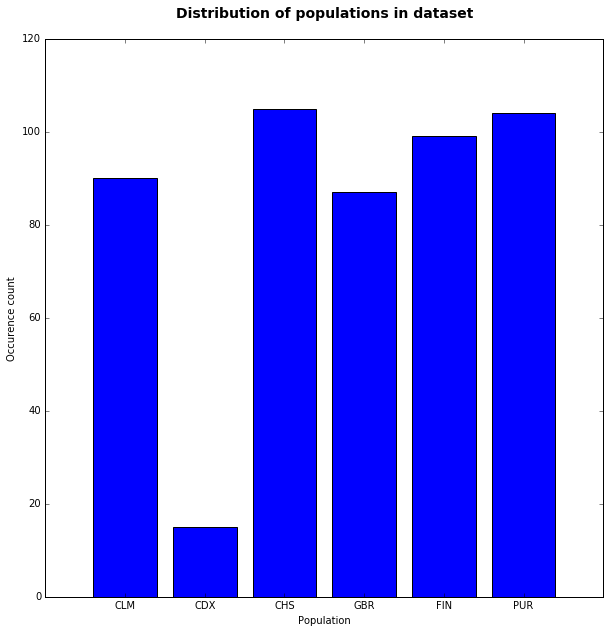

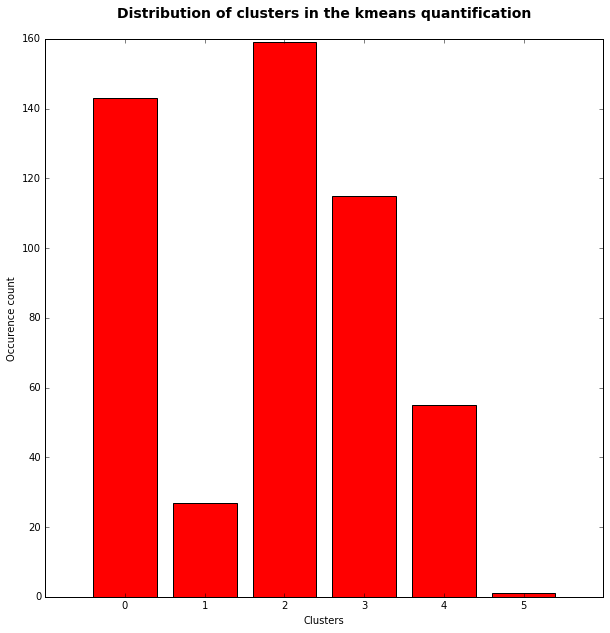

In [57]:
graph_populations()
graph_clusters()

In [23]:
def cluster_occurence():
    
    population_cluster_list = []
    population_cluster_list = compare()
    
    population_occurence_dict = {}   
    for i in population_cluster_list:
        population_occurence_dict[i] = 0
    
    i = 0
    j = 0
    for i in (population_cluster_list):
        if ( i[1] == j and i in population_occurence_dict):
            population_occurence_dict[i] += 1
        else:
            population_occurence_dict[i] += 1
            j += 1
        
    return population_occurence_dict
    

In [24]:
def normalize_cluster_occurence(pop_size):
    
    population_occurence_dict = cluster_occurence()
    
    poercent = 0.0
    for i ,j in population_occurence_dict.iteritems():
        percent = (float(j)/float(pop_size))*100.0
        population_occurence_dict[i] = percent
    
    """
    normalized_dict = {}
    for i in population_occurence_dict:
        population_occurence_dict[i[0]] = 0
    
    i = 0
    j = 0
    for i in (population_occurence_dict):
        if ( i[1] == j and i in population_occurence_dict):
            #population_occurence_dict[i]
            compute average
        else:
            compute average
            j += 1
    """
    
    return population_occurence_dict
        

In [40]:
normalize_cluster_occurence(500)

{(u'CDX', 0): 0.6,
 (u'CDX', 1): 0.2,
 (u'CDX', 2): 1.0,
 (u'CDX', 3): 1.2,
 (u'CHS', 0): 6.4,
 (u'CHS', 1): 1.4000000000000001,
 (u'CHS', 2): 5.800000000000001,
 (u'CHS', 3): 5.6000000000000005,
 (u'CHS', 4): 1.7999999999999998,
 (u'CLM', 0): 5.6000000000000005,
 (u'CLM', 1): 0.6,
 (u'CLM', 2): 6.4,
 (u'CLM', 3): 3.2,
 (u'CLM', 4): 2.1999999999999997,
 (u'FIN', 0): 4.8,
 (u'FIN', 1): 1.7999999999999998,
 (u'FIN', 2): 6.0,
 (u'FIN', 3): 3.8,
 (u'FIN', 4): 3.2,
 (u'FIN', 5): 0.2,
 (u'GBR', 0): 4.8,
 (u'GBR', 1): 0.6,
 (u'GBR', 2): 5.800000000000001,
 (u'GBR', 3): 5.0,
 (u'GBR', 4): 1.2,
 (u'PUR', 0): 6.4,
 (u'PUR', 1): 0.8,
 (u'PUR', 2): 6.800000000000001,
 (u'PUR', 3): 4.2,
 (u'PUR', 4): 2.6}

In [25]:
def graph_cluster_occurence():

    population_occurence_dict = normalize_cluster_occurence(500)
    
    fig = plt.figure(1,(38.,8.))

    plt.bar(range(len(population_occurence_dict)),  population_occurence_dict.values(), align='center', color='g')
    plt.xticks(range(len(population_occurence_dict)),  population_occurence_dict.keys())
    
    ax = fig.add_subplot(111)
    ax.set_title('Distribution of clusters in the kmeans quantification\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('Population and its associated cluster')
    ax.set_ylabel('Occurence count')
    plt.show()
    

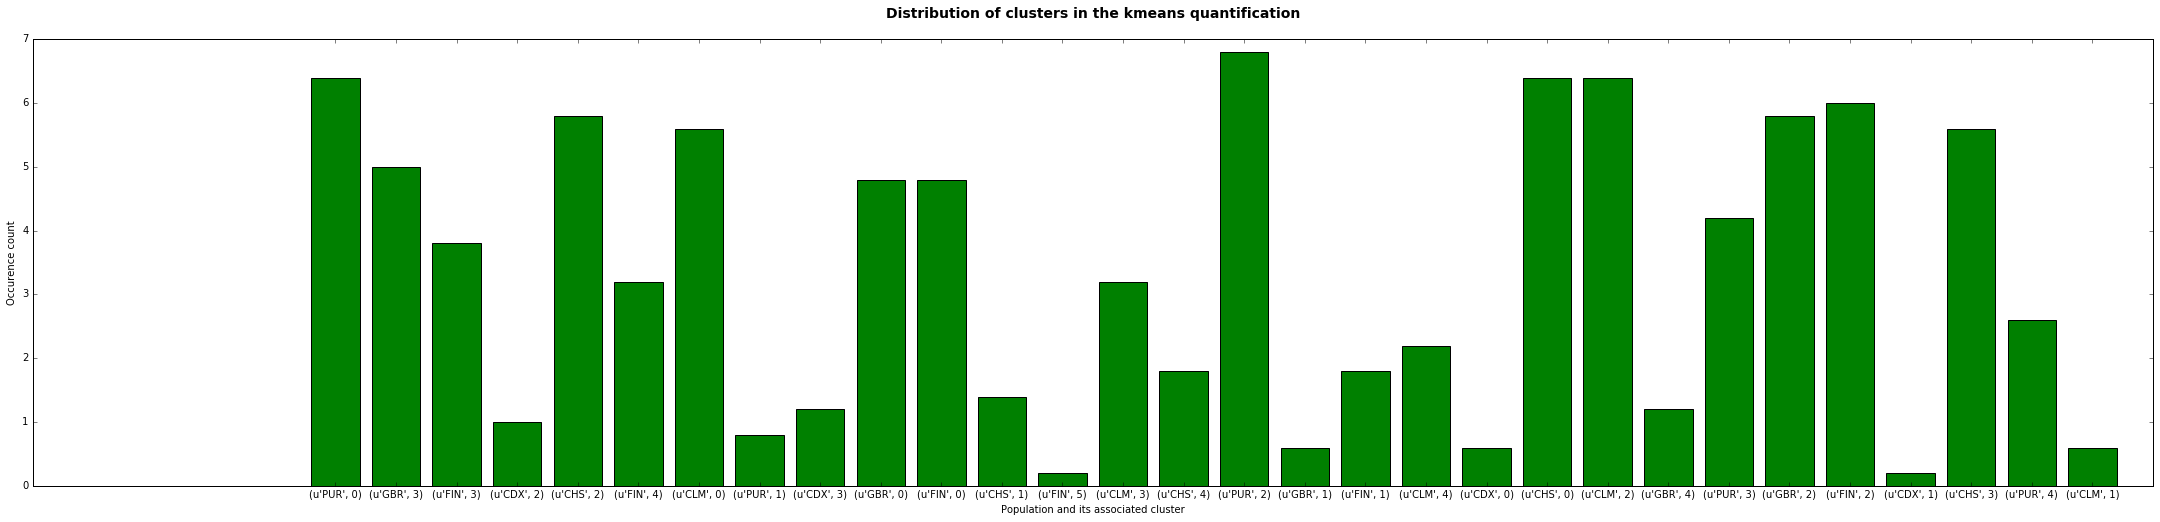

In [30]:
graph_cluster_occurence()

In [69]:
def graph_population_map():
    
    population_map = {}
    population_map = map_call_set_ids_to_population_group() 
    avg_populatin_map = {} 
    for i,j in population_map.iteritems():
        avg_populatin_map[j] = 0

    count = 0
    for i in avg_populatin_map:
        for j,k in population_map.iteritems():
            if ( i == k ):
                avg_populatin_map[i] += 1
                count += 1
    print ( avg_populatin_map)   
    print (count)
    for i,j in avg_populatin_map.iteritems():
        avg_populatin_map[i] /= 2504.0
        avg_populatin_map[i] *= 100.0
    
    total = 0
    for i,j in avg_populatin_map.iteritems():
        total += j
    
    avg = total/len(avg_populatin_map)
    print (len(avg_populatin_map))
    print (avg)
    
    avg_populatin_map = sorted(avg_populatin_map.items(), key=operator.itemgetter(1))   
    avg_populatin_map = dict(avg_populatin_map)
    
    fig = plt.figure(1,(15.,10.))
    plt.bar(range(len(avg_populatin_map)),  avg_populatin_map.values(), align='center', color='y')
    plt.xticks(range(len(avg_populatin_map)),  avg_populatin_map.keys())
    ax = fig.add_subplot(111)
    ax.set_title('Distribution of populations in the 1kgenomes dataset\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('Population')
    ax.set_ylabel('Average amount this population has been sampled')
    plt.show()

{u'ACB': 96, u'CLM': 94, u'BEB': 86, u'PEL': 85, u'LWK': 99, u'MSL': 85, u'GBR': 91, u'IBS': 107, u'ASW': 61, u'TSI': 107, u'KHV': 99, u'CEU': 99, u'YRI': 108, u'CHB': 103, u'GWD': 113, u'STU': 102, u'CHS': 105, u'ESN': 99, u'FIN': 99, u'GIH': 103, u'PJL': 96, u'MXL': 64, u'ITU': 102, u'CDX': 93, u'JPT': 104, u'PUR': 104}
2504
26
3.84615384615


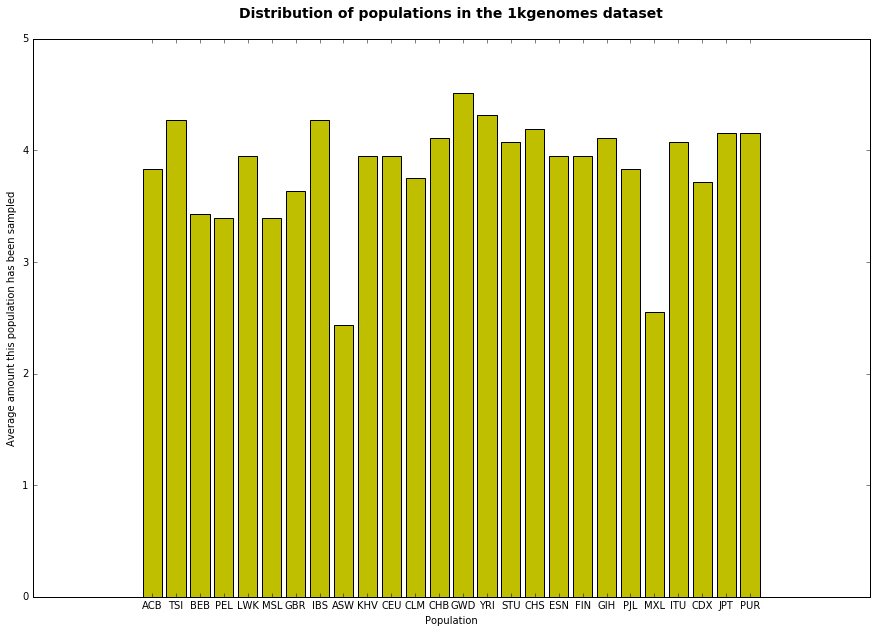

In [70]:
graph_population_map()

In [59]:
cluster_occurence()

{(u'CDX', 0): 3,
 (u'CDX', 1): 1,
 (u'CDX', 2): 5,
 (u'CDX', 3): 6,
 (u'CHS', 0): 32,
 (u'CHS', 1): 7,
 (u'CHS', 2): 29,
 (u'CHS', 3): 28,
 (u'CHS', 4): 9,
 (u'CLM', 0): 28,
 (u'CLM', 1): 3,
 (u'CLM', 2): 32,
 (u'CLM', 3): 16,
 (u'CLM', 4): 11,
 (u'FIN', 0): 24,
 (u'FIN', 1): 9,
 (u'FIN', 2): 30,
 (u'FIN', 3): 19,
 (u'FIN', 4): 16,
 (u'FIN', 5): 1,
 (u'GBR', 0): 24,
 (u'GBR', 1): 3,
 (u'GBR', 2): 29,
 (u'GBR', 3): 25,
 (u'GBR', 4): 6,
 (u'PUR', 0): 32,
 (u'PUR', 1): 4,
 (u'PUR', 2): 34,
 (u'PUR', 3): 21,
 (u'PUR', 4): 13}

In [27]:
def cluster_variant_matrix(callMatrix, num_people, num_chrom, begin, stop, clusters):
       
    csid_dict = {}    
    csid_dict = assign_labels_to_indexes(callMatrix, num_people, num_chrom, begin, stop, clusters)
    
    callMatrix = np.array(callMatrix)
    
    h = len(csid_dict)
    w = len(csid_dict)
    dimension = h*w
    
    callMatrix = [[0 for x in range(w)] for y in range(h)]    
    np.zeros((h,w))     
    #np.reshape(callMatrix, (h,w))
    
    vs = client.search_variants(variant_set_id, call_set_ids= call_set_ids[0:num_people],
           start=begin, end=stop, reference_name = num_chrom)

    for v in vs:
        for call_outer in v.calls:         
            for call_inner in v.calls:               
                outer_index = (csid_dict[call_outer.call_set_id])[1] 
                inner_index = (csid_dict[call_inner.call_set_id])[1]                             
                # can be 0 or 1
                A1 = call_outer.genotype[0] 
                A2 = call_outer.genotype[1]
                B1 = call_inner.genotype[0]
                B2 = call_inner.genotype[1]               
                # True for the shared genotype
                if (((A1 + A2 ) > 0) and ((B1 + B2) > 0)):
                    callMatrix[outer_index][inner_index] += 1
                elif (((A1 + A2 ) == 0) and ((B1 + B2) == 0)):
                    callMatrix[outer_index][inner_index] += 1               
                
    return (callMatrix)

In [28]:
def visualize_cluster_matrix_color(callMatrix, num_people, num_chrom, begin, stop, clusters):
    
    callMatrix = cluster_variant_matrix(callMatrix, num_people, num_chrom, begin, stop, clusters)
    
    
    fig = plt.figure(1,(10.,10.))
    grid = ImageGrid(fig, 111,
                    nrows_ncols=(1,1),
                    axes_pad=0.1)
    
    ax = grid[0]
    ax.set_title('Color matrix of variant clustering\n', fontsize=14, fontweight='bold')
    ax.set_xlabel("Individual's call set ids", fontsize=12)
    ax.set_ylabel("Individual's call set ids", fontsize=12)    
    ax.imshow(callMatrix, origin = "lower", interpolation="nearest")
    
    plt.show()


def visualize_cluster_matrix_grey(callMatrix, num_people, num_chrom, begin, stop, clusters):
        
    
    callMatrix = cluster_variant_matrix(callMatrix, num_people, num_chrom, begin, stop, clusters)
    
    fig = plt.figure(1,(10.,10.))
   
    grid = ImageGrid(fig, 111,
                    nrows_ncols=(1,1),
                    axes_pad=0.1)
    ax = grid[0]  
    ax.set_title('Greyscale matrix of variant clustering\n', fontsize=14, fontweight='bold')
    ax.set_xlabel("Individual's call set ids", fontsize=12)
    ax.set_ylabel("Individual's call set ids", fontsize=12)
    
    ax.imshow(callMatrix, cmap= 'Greys', origin = "lower", interpolation="nearest")
    
 
    plt.show()

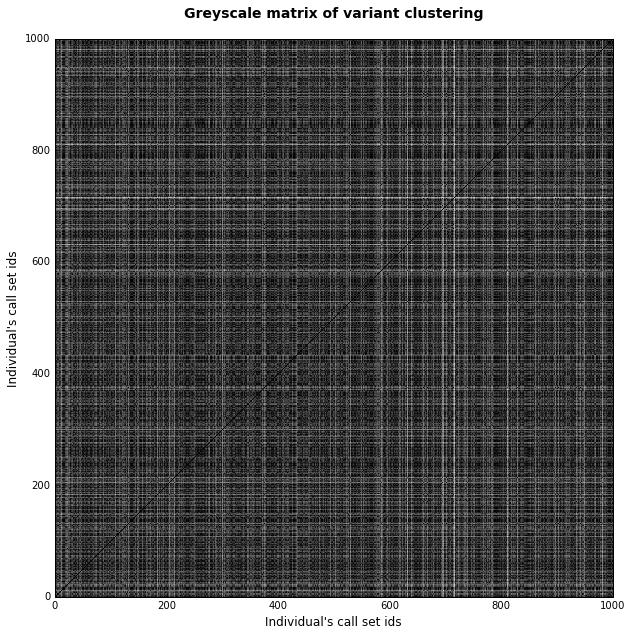

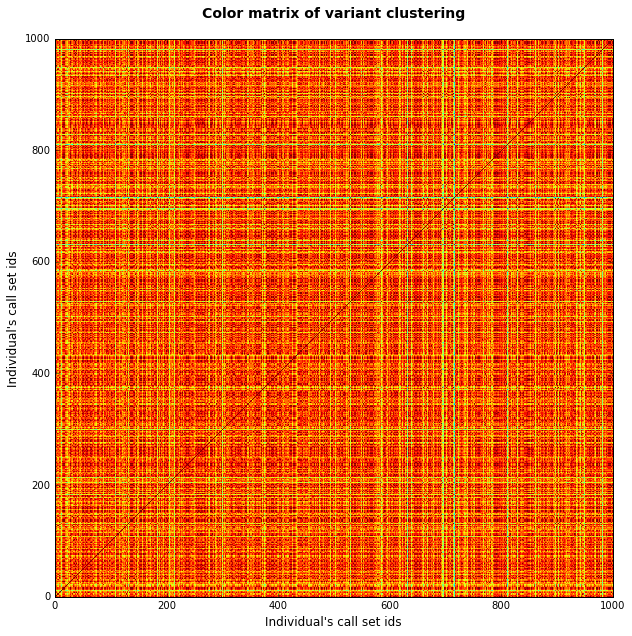

In [77]:
matrix = {}
visualize_cluster_matrix_grey(matrix, 1000, "1", 100000, 200000, 14)
matrix = {}
visualize_cluster_matrix_color(matrix, 1000, "1", 100000, 200000, 14)

# Determine Matrix Range 

In [29]:
def determine_matrix_range(matrix, num_people, num_chrom, begin, stop):
    
    matrix = {}
    matrix = variant_matrix(matrix, num_people, num_chrom, begin, stop)
    
    i = 0
    j = 0
    cur = 0
    lis = []
    
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            cur = matrix[i][j]
            lis.append(cur)
    minimum = 0
    maximum = 0 
    if (len(lis) > 0):        
        minimum = min(lis)
        maximum = max(lis)
    #print ("values in the matrix range from {} to {}".
    #       format(minimum, maximum))
    lis.sort()

    return lis

In [30]:
#determine_matrix_range()

In [31]:
def find_percent_occurence(matrix, num_people, num_chrom, begin, stop):
    
    matrix_list = []
    matrix = {}
    matrix_list = determine_matrix_range(matrix, num_people, num_chrom, begin, stop)   
    i = 0
    key_list = []
    j = 0
    for i in matrix_list:
        variable = matrix_list[j]
        if (variable == i):
            key_list.append(variable)
            j += 1
        elif ( variable != i):
            j += 1
            
    occur_dict = {}
    occur_dict = occur_dict.fromkeys(key_list,0)
    i = 0
    j = 0  
    total = 0.0
    for i in matrix_list:
        variable = matrix_list[j]
        if ( i == variable):
            occur_dict[i] += 1
            j += 1
        elif ( i != variable):
            j += 1
        total += 1
    
    percent = 0.0
    for i in occur_dict:
        percent = ((occur_dict[i]/total)*100.0)
        occur_dict[i] = percent
    
    return occur_dict


In [32]:
#find_percent_occurence()

In [33]:
def graph_percent_occurence(matrix, num_people, num_chrom, begin, stop):
    
    fig = plt.figure(1,(9.,9.))
    
    matrix = {}
    occur_dict = {}
    occur_dict = find_percent_occurence(matrix, num_people, num_chrom, begin, stop)
    
    occur_dict = collections.OrderedDict(sorted(occur_dict.items()))
    
    plt.bar(range(len(occur_dict)), occur_dict.values(), align='center')
    plt.xticks(range(len(occur_dict)), occur_dict.keys())
    
    ax = fig.add_subplot(111)
    ax.set_title('Distribution of shared variants among the genomic dataset (as compared to the reference genome)\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('number of shared variants called within a range of bases on one chromosome')
    ax.set_ylabel('percent occurence of the amount of shared variants')
    plt.show()
    

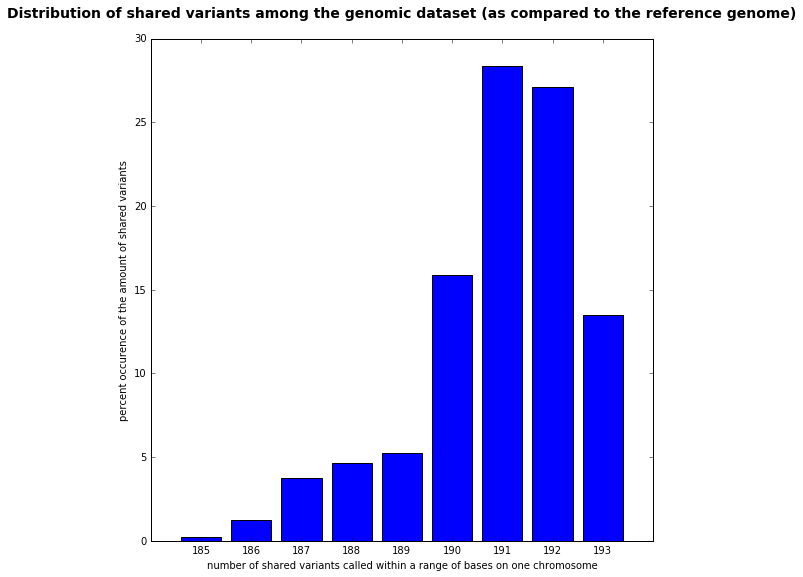

In [34]:
matrix = {}
graph_percent_occurence(matrix, 40, "1", 100000, 140000)

In [35]:
def mean_median_percent_occurence(matrix, num_people, num_chrom, begin, stop):
    
    matrix = {}
    occur_dict = {}
    occur_dict = find_percent_occurence(matrix, num_people, num_chrom, begin, stop)
    
    i = 0
    mean = 0.0
    median_index = 0
    for i in occur_dict:
        # print the dictionary of the percent occurence of shared variants 
        #print (i, occur_dict[i]) 
        mean += ((i*occur_dict[i])/100.0)
        median_index += 1
    
    median = 0.0
    if ((( median_index + 1) % 2) == 0 ):
        median_index += 1
        median_index /= 2        
        iter = 0
        i = 0
        for i in occur_dict:
            iter += 1
            if (iter == median_index):
                median = i
    elif ((median_index % 2) == 0):
        median_index /= 2
        median_neighbor = median_index + 1
        median_pair_index = (median_index, median_neighbor)
        iter1 = 0
        iter2 = 0
        i = 0
        for i in occur_dict:
            iter1 += 1
            iter2 += 1
            if ( iter1 == median_pair_index[0]):
                iter1 = i
                iter2 += 1
            if ( iter2 == median_pair_index[1]): 
                iter2 = i
                median = ((iter1 + iter2)/2)
                
    mean_median_pair = (mean, median)
    
    #print (mean_median_pair)
    return mean_median_pair

In [36]:
#marix = {}
#mean_median_percent_occurence(matrix, 40, "1", 100000, 140000)

In [37]:
def analyze_matrix_intervals():
    callMatrix = {}
    start = 100000
    place = 105000
    stop = 1000000
    mean_median_pair_dict = {}
    val = 0
    while ( start != stop):
        mean_median_pair_dict[val] = mean_median_percent_occurence(callMatrix, 40, "1", start, place )     
        val += 1
        place += 5000
        start += 5000
        
       
    fig = plt.figure(1,(20.,10.))
    ylim(-1.0, 100.0)
         
    i = 0
    j = 0
    interval = 0
    plt.ion()
    for i,j in mean_median_pair_dict.values():  
        if ( interval != val):
            plt.scatter(interval, i, c= "blue", s=40) 
            plt.scatter(interval, j, c= "red", s=40) 
            plt.pause(0.05)
        if ( interval + 1 == val):
            plt.scatter(interval, i, c= "blue", s=40, label= "mean") 
            plt.scatter(interval, j, c= "red", s=40, label= "median") 
            plt.pause(0.05)        
        interval += 1  
        
    plt.plot(range(len(mean_median_pair_dict)), mean_median_pair_dict.values(), 'k')
    xlim(0, interval)
    plt.xticks(np.arange(interval))
  
    ax = fig.add_subplot(111)
    ax.set_title('Conservation of shared variants throughout 5000bp intervals\n', fontsize=14, fontweight='bold')
    ax.set_xlabel('interval')
    ax.set_ylabel('percent occurence of the amount of shared variants')
    ax.legend()


    plt.show()
               
    #return mean_median_pair_list

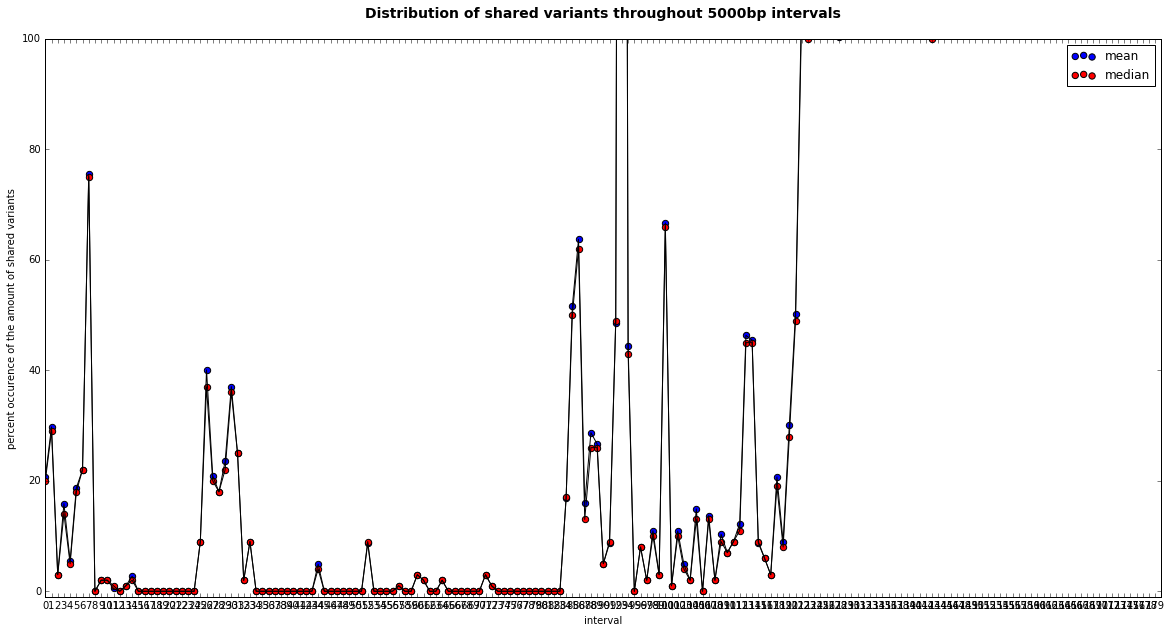

In [448]:
analyze_matrix_intervals()

In [38]:
def k_means_clustering_on_variant_matrix2():
    
    # number of individuals ()
    N = 1000
    # assumed number of populations (n_clusters)
    C = 28
    # randomization
    rand = RandomState(1123581321)
    
    # matrix generation 
    matrix = {}
    matrix = variant_matrix(matrix, N, "1", 100000, 110000)
    #for i in range(len(matrix)):
    #    print (matrix[i])
    
    # linear dimensionality reduction  
    matrix = PCA(n_components=2).fit_transform(matrix)
    # initialize KMeans clustering object
    kmeans_obj = KMeans(n_clusters=C, n_init=10, 
                    init='k-means++', precompute_distances=True,
                    tol=1e-4, random_state= rand)
    # Compute clustering and transform matrix to cluster-distance space.
    kmeans_obj.fit(matrix)
    
    # mesh step size
    h=0.02
        
    # Plot the decision boundary. For that, we will assign a color to each
    x_min = matrix[:, 0].min() - 1
    x_max = matrix[:, 0].max() + 1
    y_min = matrix[:, 1].min() - 1
    y_max = matrix[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # obtain labels on the mesh
    mesh = kmeans_obj.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh = mesh.reshape(xx.shape)
    fig = plt.figure(1,(10.,10.))
  
    plt.clf()
    plt.imshow(mesh, interpolation = 'nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect='auto', origin='lower')
    
    plt.plot(matrix[:, 0], matrix[:, 1], 'k.', markersize=2)
    centroids = kmeans_obj.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
            
  
    
    plt.show()

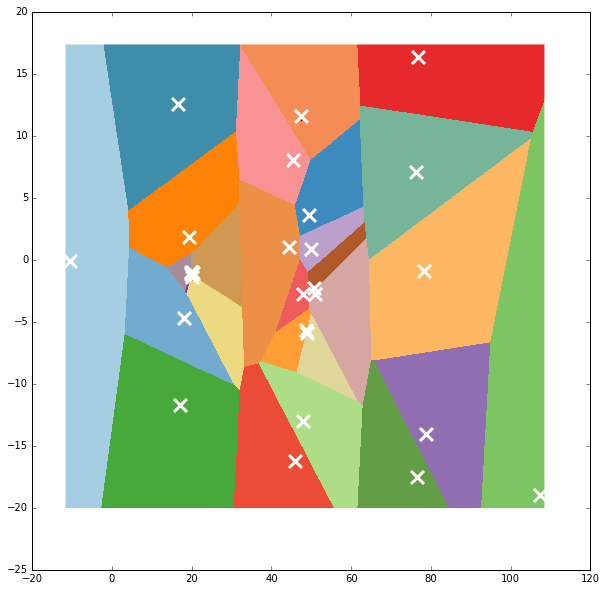

In [235]:
k_means_clustering_on_variant_matrix2()

In [39]:
def k_means_clustering_on_variant_matrix3():
    
    # number of individuals ()
    N = 100
    # assumed number of populations (n_clusters)
    C = 6
    # randomization
    rand = RandomState(1123581321) 
    # matrix generation 
    matrix = {}
    matrix = variant_matrix(matrix, N, "1", 100000, 130000)
    # initialize KMeans clustering object
    kmeans_obj = KMeans(n_clusters=C, n_init=10, 
                    init='k-means++', precompute_distances=True,
                    tol=1e-4, random_state= rand)
    # Compute clustering and transform matrix to cluster-distance space. 
    labels = kmeans_obj.fit_predict(matrix)

    fig = plt.figure(1,(10.,10.))
    ax = Axes3D(fig,rect=[0, 0, .95, 1], elev=48, azim=134)
    
    
    centroids = kmeans_obj.cluster_centers_
   
    ax.scatter(matrix[:][3], matrix[:][0], matrix[:][2], c=labels.astype(np.float))
      
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    
    plt.show()


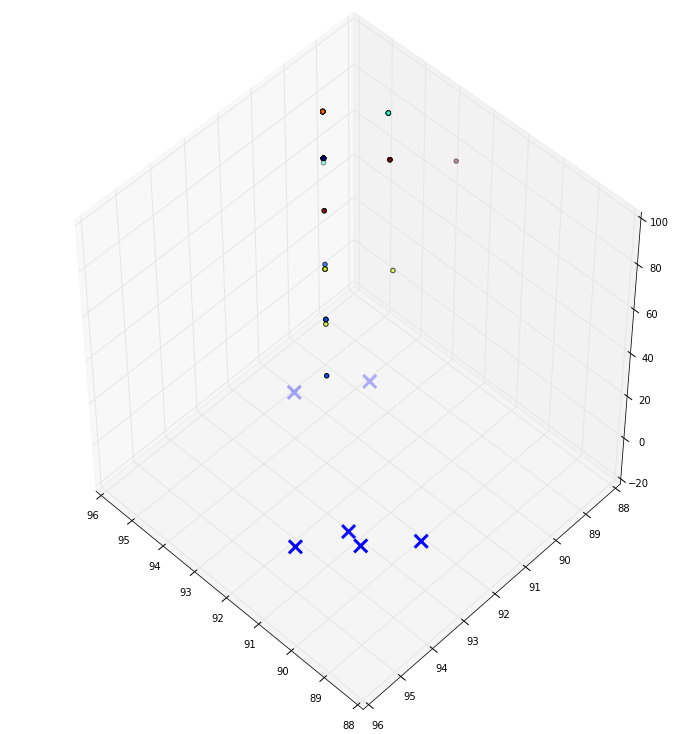

In [30]:
k_means_clustering_on_variant_matrix3()